In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# citipy module to determine city based on latitude and longitude.
from citipy import citipy
# datetime module for date format
from datetime import datetime
import requests 
# Import the API key.
from config import weather_api_key

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

alofi nu
kloulklubed pw
hvolsvollur is
homa bay ke
kapaa us
ribeira grande pt
shingu jp
ushuaia ar
kodiak us
saint-philippe re
mataura pf
rikitea pf
rikitea pf
vao nc
mataura pf
khatanga ru
port alfred za
ushuaia ar
formosa ar
dikson ru
hasaki jp
ushuaia ar
hasaki jp
mocambique mz
saint george bm
arraial do cabo br
northam au
rikitea pf
tuktoyaktuk ca
bengkulu id
sao joao da barra br
butaritari ki
waw sd
mataura pf
olafsvik is
bluff nz
punta arenas cl
port alfred za
albany au
hilo us
havelock us
vondrozo mg
ponta do sol cv
castro cl
illoqqortoormiut gl
punta arenas cl
buin pg
atuona pf
tasiilaq gl
ushuaia ar
elko us
saskylakh ru
hilo us
albany au
severo-kurilsk ru
rio gallegos ar
maues br
busselton au
hermanus za
tocopilla cl
nikolskoye ru
puerto ayora ec
araouane ml
ushibuka jp
sinjar iq
bredasdorp za
bandarbeyla so
mys shmidta ru
belushya guba ru
carnarvon au
khatanga ru
tautira pf
saint george bm
galveston us
port alfred za
port alfred za
bukachacha ru
new norfolk au
rikitea pf
ushu

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
cities

[]

In [13]:
# Create an empty list to hold the weather data.
city_data = []
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
#len(city_data)


# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# counters are initialized at 1 so the first iteration of the 
# logging for each recorder response starts at 1
### correct method for loop
# loop through all cities in list
for i, city in enumerate(cities):
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # create an endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alofi
Processing Record 2 of Set 1 | kloulklubed
Processing Record 3 of Set 1 | hvolsvollur
Processing Record 4 of Set 1 | homa bay
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | shingu
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | vao
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | formosa
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | hasaki
Processing Record 19 of Set 1 | mocambique
City not found. Skipping...
Processing Record 20 of Set 1 | saint george
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 22 of Set 1 | northam
Processin

Processing Record 36 of Set 4 | karauzyak
City not found. Skipping...
Processing Record 37 of Set 4 | guerrero negro
Processing Record 38 of Set 4 | narsaq
Processing Record 39 of Set 4 | hithadhoo
Processing Record 40 of Set 4 | touros
Processing Record 41 of Set 4 | luanda
Processing Record 42 of Set 4 | liberal
Processing Record 43 of Set 4 | keelung
Processing Record 44 of Set 4 | dukat
Processing Record 45 of Set 4 | westport
Processing Record 46 of Set 4 | sayyan
Processing Record 47 of Set 4 | sistranda
Processing Record 48 of Set 4 | vila
Processing Record 49 of Set 4 | portland
Processing Record 50 of Set 4 | atar
Processing Record 1 of Set 5 | primorsk
Processing Record 2 of Set 5 | orlik
Processing Record 3 of Set 5 | edgewater
Processing Record 4 of Set 5 | taltal
Processing Record 5 of Set 5 | pimentel
Processing Record 6 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 5 | atherton
Processing Record 8 of Set 5 | whitehorse
Processing Record 9 of

In [14]:
# Convert array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_data_df = city_data_df[new_column_order]
new_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alofi,NU,2021-07-28 18:25:43,-19.0595,-169.9187,67.89,94,100,3.44
1,Kloulklubed,PW,2021-07-28 18:25:43,7.0419,134.2556,75.70,76,92,4.61
2,Hvolsvollur,IS,2021-07-28 18:25:44,63.7533,-20.2243,62.82,65,99,7.67
3,Homa Bay,KE,2021-07-28 18:25:44,-0.5273,34.4571,74.88,68,72,5.77
4,Kapaa,US,2021-07-28 18:25:44,22.0752,-159.3190,79.12,80,75,6.91
5,Ribeira Grande,PT,2021-07-28 18:25:45,38.5167,-28.7000,77.40,65,40,13.80
6,Shingu,JP,2021-07-28 18:25:45,33.7333,135.9833,80.91,91,4,5.23
7,Ushuaia,AR,2021-07-28 18:25:05,-54.8000,-68.3000,46.02,81,40,4.61
8,Kodiak,US,2021-07-28 18:25:46,57.7900,-152.4072,56.71,72,90,5.75
9,Saint-Philippe,RE,2021-07-28 18:25:46,-21.3585,55.7679,74.79,88,100,17.96


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

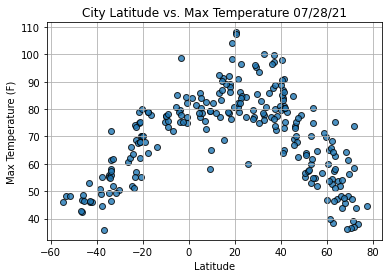

In [26]:
# import time module
import time

# build scatter plot for lat vs. max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# show plot
plt.show()

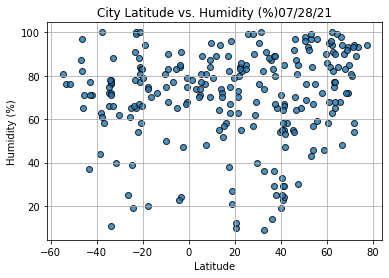

In [33]:
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (%)"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# show plot
plt.show()

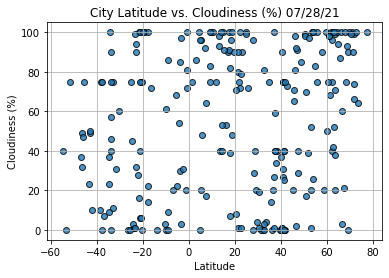

In [34]:
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# show plot
plt.show()

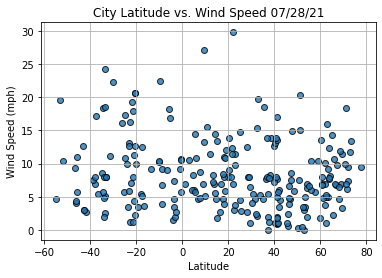

In [36]:
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# show plot
plt.show()